In [102]:
## 필요한 모듈 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
import matplotlib as mpl

In [103]:
## 한글설정
path = 'C:\Windows\Fonts\H2HDRM.TTF'

font_name = fm.FontProperties(fname= path).get_name()
rc('font', family = font_name)

## 마이너스
mpl.rcParams['axes.unicode_minus']= False

In [134]:
## 필요한 엑셀 데이터 불러오기
df_data_ma = pd.read_csv('./시도모의 연령(5세계급)모의 교육정도별 출생(2008_2021).csv',encoding= 'euc-kr' )
df_data_fa = pd.read_csv('./시도부의 연령(5세계급)부의 교육정도별 출생(2008_2021).csv',encoding= 'euc-kr')
#df_data_dis = pd.read_excel('./전국 연령별,장애유형별,성별 등록장애인수(2007_2021).xls')

In [105]:
## 형태 확인
df_data_ma.head(20)

,시도별,모의 연령(5세계급)별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 19
0,전국,계,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562,NaN
1,전국,계,무학,출생[명],명,352,377,379,384,371,265,269,237,153,149,244,238,281,205,NaN
2,전국,계,초등학교,출생[명],명,1663,1580,1632,1638,1490,1343,1203,1075,924,811,607,644,551,434,NaN
3,전국,계,중고등학교,출생[명],명,167397,150203,150424,143917,137969,116785,107723,102147,90332,76165,65569,58735,51110,44836,NaN
4,전국,계,중학교,출생[명],명,8482,8123,8122,8436,8250,7410,6600,6031,5559,4806,4187,3964,3404,2834,NaN
5,전국,계,고등학교,출생[명],명,158915,142080,142302,135481,129719,109375,101123,96116,84773,71359,61382,54771,47706,42002,NaN
6,전국,계,초대.전문대이상,출생[명],명,292447,288879,313814,323625,343255,316848,324434,332582,311005,276099,255070,237054,213601,208489,NaN
7,전국,계,대학(교),출생[명],명,268460,264593,286636,295019,311734,286421,292219,299306,279666,247470,228164,211580,190368,185278,NaN
8,전국,계,대학원 이상,출생[명],명,23987,24286,27178,28606,31521,30427,32215,33276,31339,28629,26906,25474,23233,23211,NaN
9,전국,계,미상,출생[명],명,4033,3810,3922,1701,1465,1214,1806,2379,3829,4547,5332,6005,6794,6598,NaN


In [106]:
## 출산시 모의 나이 데이터 간소화
df_data_ma_age = df_data_ma.iloc[:103:10,:19]

df_data_ma_age.set_index('모의 연령(5세계급)별',inplace=True)
df_data_ma_age

,시도별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
모의 연령(5세계급)별,,,,,,,,,,,,,,,,,,
계,전국,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세미만,전국,총계,출생[명],명,46,27,34,19,29,20,22,16,15,6,8,10,11,8
15 - 19세,전국,총계,출생[명],명,2728,2788,2900,2979,2917,2813,2527,2211,1907,1520,1292,1096,907,492
20 - 24세,전국,총계,출생[명],명,28173,24911,24538,24648,24619,22051,21171,20514,19078,15768,13313,11303,9612,7599
25 - 29세,전국,총계,출생[명],명,168893,155906,147197,137008,127192,102801,96192,94622,85036,74026,65029,57834,50631,45781
30 - 34세,전국,총계,출생[명],명,198748,192112,214616,221434,239223,220346,221145,216252,192968,161045,143067,131334,118909,115290
35 - 39세,전국,총계,출생[명],명,59596,60694,70835,74245,78982,77183,82226,92081,94313,92645,91101,87300,78315,76238
40 - 44세,전국,총계,출생[명],명,6537,7303,8840,10126,11098,10714,11523,12138,12336,12202,12417,13242,13482,14670
45 - 49세,전국,총계,출생[명],명,334,330,389,443,392,284,308,335,371,373,389,398,340,362


In [107]:
## 자료에 숫자만 남기기
df_data_ma_age.drop(['시도별', '교육정도별', '항목', '단위'], axis= 1, inplace= True)
df_data_ma_age

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
모의 연령(5세계급)별,,,,,,,,,,,,,,
계,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세미만,46,27,34,19,29,20,22,16,15,6,8,10,11,8
15 - 19세,2728,2788,2900,2979,2917,2813,2527,2211,1907,1520,1292,1096,907,492
20 - 24세,28173,24911,24538,24648,24619,22051,21171,20514,19078,15768,13313,11303,9612,7599
25 - 29세,168893,155906,147197,137008,127192,102801,96192,94622,85036,74026,65029,57834,50631,45781
30 - 34세,198748,192112,214616,221434,239223,220346,221145,216252,192968,161045,143067,131334,118909,115290
35 - 39세,59596,60694,70835,74245,78982,77183,82226,92081,94313,92645,91101,87300,78315,76238
40 - 44세,6537,7303,8840,10126,11098,10714,11523,12138,12336,12202,12417,13242,13482,14670
45 - 49세,334,330,389,443,392,284,308,335,371,373,389,398,340,362


In [108]:
df_data_ma_age
type(df_data_ma_age)

pandas.core.frame.DataFrame

In [109]:
## 매개변수로 dataframe을 넣어 각 나이별 비율이 어떻게 되는지 계산해서 데이터 프레임으로 만들어주는 함수
## 매개변수의 형태로 index1의 값은 그 뒤의 모든 데이터 값의 합으로 되어있어야 의미있는 함수 사용 가능
def calcul_ratio(df):
    if type(df) == pd.DataFrame:
        list_index = df.index
        list_columns = df.columns
        dict_data = {}
        
        for i in range(0,len(list_columns)):
            list_data = []
            for j in range(0,len(list_index)-1):
                list_data.append(df.iloc[j+1,i] / df.iloc[0,i] *100)
                # print(list_data)
                dict_data[list_columns[i]] = list_data
                # print(dict_data)
                
        df_result = pd.DataFrame(dict_data, index=list_index[1:])
        return df_result        
    else:
        print("자료가 데이터 프레임이 아닙니다.")

In [110]:
# 비율계산 함수 사용
df_ratio_result = calcul_ratio(df_data_ma_age)

print(df_ratio_result)

                 2008 년     2009 년     2010 년     2011 년     2012 년   
모의 연령(5세계급)별                                                          
15세미만          0.009874   0.006069   0.007231   0.004032   0.005985  \
15 - 19세       0.585543   0.626730   0.616797   0.632128   0.602002   
20 - 24세       6.047110   5.599878   5.218952   5.230178   5.080797   
25 - 29세      36.251535  35.046949  31.307120  29.072390  26.249510   
30 - 34세      42.659672  43.185890  45.646371  46.987152  49.370137   
35 - 39세      12.791806  13.643731  15.065795  15.754406  16.300072   
40 - 44세       1.403115   1.641681   1.880167   2.148685   2.290373   
45 - 49세       0.071690   0.074182   0.082736   0.094002   0.080900   
50세이상          0.006869   0.006294   0.013187   0.014005   0.009906   
연령미상           0.172787   0.168597   0.161643   0.063022   0.010319   

                 2013 년     2014 년     2015 년     2016 년     2017 년   
모의 연령(5세계급)별                                                          
15세미만

In [111]:
# 한 열의 값을 모두 더했을때 100이 나오는지, 함수가 의도대로 작동했는지 확인
check = df_ratio_result.iloc[:,0]

check.sum()

100.0

In [116]:
# 그래프 그릴 때 label값으로 정해주려는 변수 선언
list_collumn = df_ratio_result.index[:]
list_collumn

Index(['15세미만', '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세',
       '40 - 44세', '45 - 49세', '50세이상', '연령미상'],
      dtype='object', name='모의 연령(5세계급)별')

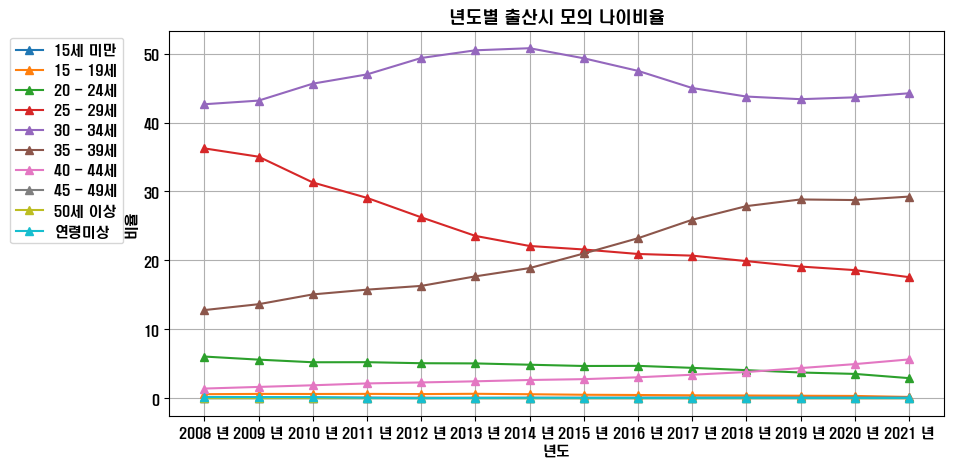

In [143]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 년도별 출산시 모의 나이비율 그래프 그리기
plt.plot(df_ratio_result.T, '^-', label = list_collumn)

# 그래프 타이틀과 label 설정
plt.title('년도별 출산시 모의 나이비율')
plt.xlabel('년도')
plt.ylabel('비율')


# 그래프 출력
plt.grid(True)
plt.legend(bbox_to_anchor=(-0.05, 1))
plt.show()

In [136]:
## 형태 확인
df_data_fa.head(20)

,시도별,부의 연령(5세계급)별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년,Unnamed: 19
0,전국,계,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562,NaN
1,전국,계,무학,출생[명],명,252,243,255,245,230,161,189,173,151,141,148,149,168,99,NaN
2,전국,계,초등학교,출생[명],명,1962,1660,1514,1361,1201,1052,903,818,667,616,431,410,320,295,NaN
3,전국,계,중고등학교,출생[명],명,151914,138172,140163,136288,132569,114030,107162,104856,95256,82590,70773,64558,57801,52270,NaN
4,전국,계,중학교,출생[명],명,8241,7427,7209,6944,6486,5759,5167,4749,4312,3722,3129,2852,2603,2162,NaN
5,전국,계,고등학교,출생[명],명,143673,130745,132954,129344,126083,108271,101995,100107,90944,78868,67644,61706,55198,50108,NaN
6,전국,계,초대.전문대이상,출생[명],명,306342,299072,322085,328094,344696,315501,321169,326530,303107,267425,247503,229125,205152,199359,NaN
7,전국,계,대학(교),출생[명],명,265245,259801,279974,285634,300656,274675,279897,285180,264772,232998,215377,199507,178338,172570,NaN
8,전국,계,대학원 이상,출생[명],명,41097,39271,42111,42460,44040,40826,41272,41350,38335,34427,32126,29618,26814,26789,NaN
9,전국,계,미상,출생[명],명,5422,5702,6154,5277,5854,5711,6012,6043,7062,6999,7967,8434,8896,8539,NaN


In [137]:
## 출산시 부의 나이 데이터 간소화
df_data_fa_age = df_data_fa.iloc[:103:10,:19]

df_data_fa_age.set_index('부의 연령(5세계급)별',inplace=True)
df_data_fa_age

,시도별,교육정도별,항목,단위,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
부의 연령(5세계급)별,,,,,,,,,,,,,,,,,,
계,전국,총계,출생[명],명,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세 미만,전국,총계,출생[명],명,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15 - 19세,전국,총계,출생[명],명,533,459,603,749,768,726,701,614,524,316,254,202,142,91
20 - 24세,전국,총계,출생[명],명,7050,5812,5877,6315,6211,6306,6360,6786,6522,5327,4350,3493,2862,2230
25 - 29세,전국,총계,출생[명],명,83340,77502,73309,69549,63733,50479,46247,45153,40563,35206,31212,27894,24521,22284
30 - 34세,전국,총계,출생[명],명,209270,195345,205354,205090,215753,193995,193602,187484,164694,134872,116784,103735,92679,88068
35 - 39세,전국,총계,출생[명],명,127976,126166,137984,138749,142641,131473,133148,140994,138323,129431,123549,116665,103406,99024
40 - 44세,전국,총계,출생[명],명,27005,28816,34232,37866,41606,40043,41732,43404,41444,38723,36679,36314,35303,36156
45 - 49세,전국,총계,출생[명],명,5371,5398,6093,6506,6848,6723,7105,7854,8323,8394,8671,9026,8355,7922


In [138]:
## 자료에 숫자만 남기기
df_data_fa_age.drop(['시도별', '교육정도별', '항목', '단위'], axis= 1, inplace= True)
df_data_fa_age

,2008 년,2009 년,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
부의 연령(5세계급)별,,,,,,,,,,,,,,
계,465892,444849,470171,471265,484550,436455,435435,438420,406243,357771,326822,302676,272337,260562
15세 미만,0,0,0,1,0,0,0,0,0,0,0,0,0,0
15 - 19세,533,459,603,749,768,726,701,614,524,316,254,202,142,91
20 - 24세,7050,5812,5877,6315,6211,6306,6360,6786,6522,5327,4350,3493,2862,2230
25 - 29세,83340,77502,73309,69549,63733,50479,46247,45153,40563,35206,31212,27894,24521,22284
30 - 34세,209270,195345,205354,205090,215753,193995,193602,187484,164694,134872,116784,103735,92679,88068
35 - 39세,127976,126166,137984,138749,142641,131473,133148,140994,138323,129431,123549,116665,103406,99024
40 - 44세,27005,28816,34232,37866,41606,40043,41732,43404,41444,38723,36679,36314,35303,36156
45 - 49세,5371,5398,6093,6506,6848,6723,7105,7854,8323,8394,8671,9026,8355,7922


In [139]:
# 비율계산 함수 사용
df_ratio_result_fa = calcul_ratio(df_data_fa_age)

print(df_ratio_result_fa)

                 2008 년     2009 년     2010 년     2011 년     2012 년   
부의 연령(5세계급)별                                                          
15세 미만         0.000000   0.000000   0.000000   0.000212   0.000000  \
15 - 19세       0.114404   0.103181   0.128251   0.158934   0.158498   
20 - 24세       1.513226   1.306511   1.249971   1.340010   1.281808   
25 - 29세      17.888266  17.422092  15.591987  14.757939  13.153029   
30 - 34세      44.918136  43.912654  43.676450  43.519039  44.526468   
35 - 39세      27.469027  28.361534  29.347620  29.441821  29.437829   
40 - 44세       5.796408   6.477704   7.280755   8.034970   8.586524   
45 - 49세       1.152842   1.213445   1.295911   1.380540   1.413270   
50세 이상         0.251775   0.271778   0.297977   0.356487   0.349396   
연령미상           0.895916   0.931102   1.131078   1.010047   1.093179   

                 2013 년     2014 년     2015 년     2016 년     2017 년   
부의 연령(5세계급)별                                                          
15세 미

In [140]:
# 그래프 그릴 때 label값으로 정해주려는 변수 선언
list_collumn = df_ratio_result_fa.index[:]
list_collumn

Index(['15세 미만', '15 - 19세', '20 - 24세', '25 - 29세', '30 - 34세', '35 - 39세',
       '40 - 44세', '45 - 49세', '50세 이상', '연령미상'],
      dtype='object', name='부의 연령(5세계급)별')

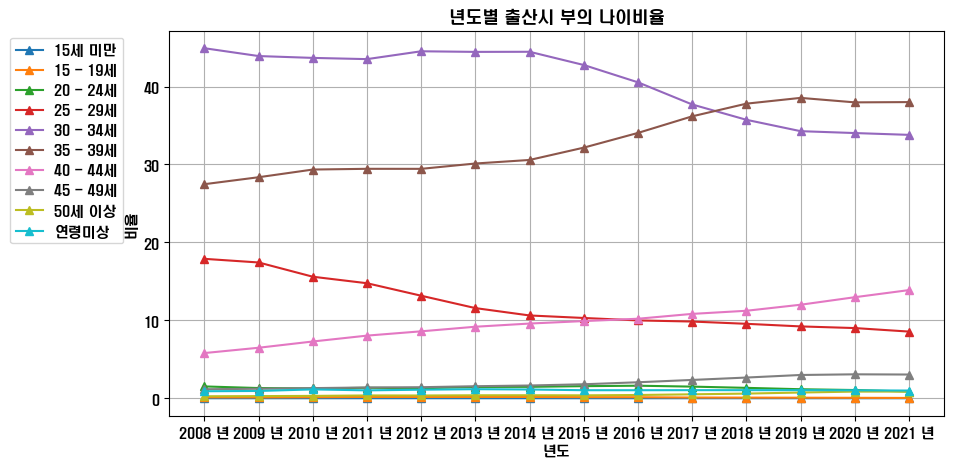

In [142]:
# 그래프 크기 설정
plt.figure(figsize=(10, 5))

# 쟁애 발생률 그래프 그리기
plt.plot(df_ratio_result_fa.T, '^-', label = list_collumn)

# 그래프 타이틀과 레이블 설정
plt.title('년도별 출산시 부의 나이비율')
plt.xlabel('년도')
plt.ylabel('비율')


# 그래프 출력
plt.grid(True)
plt.legend(bbox_to_anchor=(-0.05, 1))
plt.show()